In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [4]:
df = pd.read_csv(r"D:\projects\FuelConsumption.csv")
df

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230
...,...,...,...,...,...,...,...,...,...,...
634,2000,VOLVO,V70 AWD TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,14.4,288
635,2000,VOLVO,V70 GLT TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,13.6,274
636,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,A4,Z,13.9,274
637,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,M5,Z,13.0,260


In [5]:
df.info()
df

df.describe()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.0+ KB


,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230
...,...,...,...,...,...,...,...,...,...,...
634,2000,VOLVO,V70 AWD TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,14.4,288
635,2000,VOLVO,V70 GLT TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,13.6,274
636,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,A4,Z,13.9,274
637,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,M5,Z,13.0,260


In [6]:
df.columns

Index(['Year', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'COEMISSIONS '],
      dtype='object')

In [7]:
significant=df[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]
significant.head()

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
0,1.6,4,10.5,216
1,1.6,4,9.8,205
2,3.2,6,13.7,265
3,3.5,6,15.0,301
4,1.8,4,11.4,230


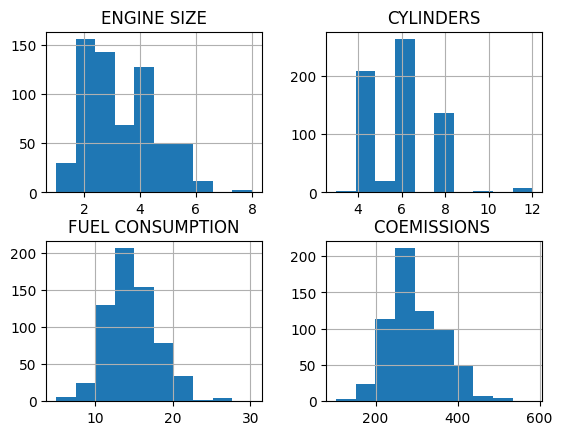

In [8]:
visual = significant[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]
visual.hist()
plt.show()

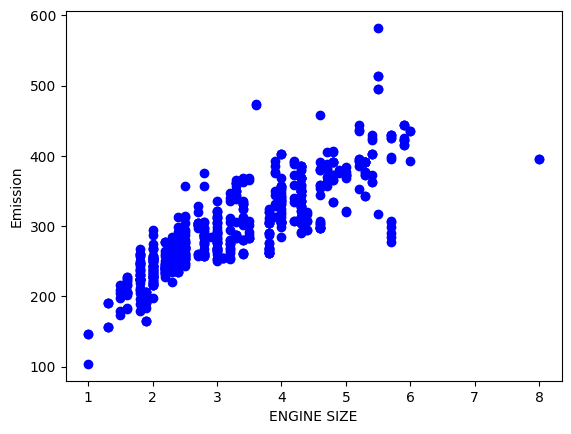

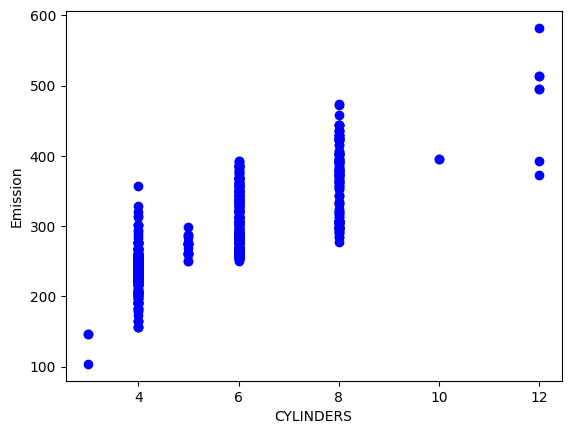

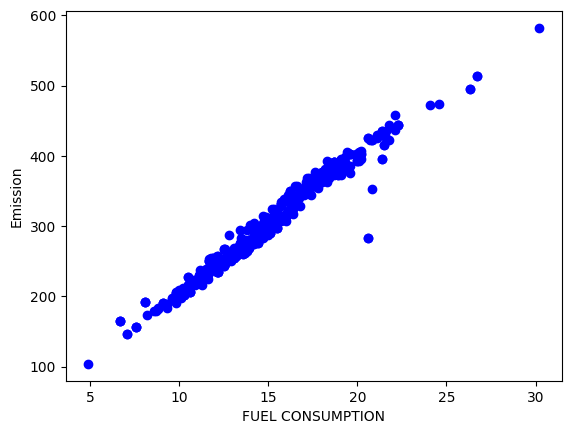

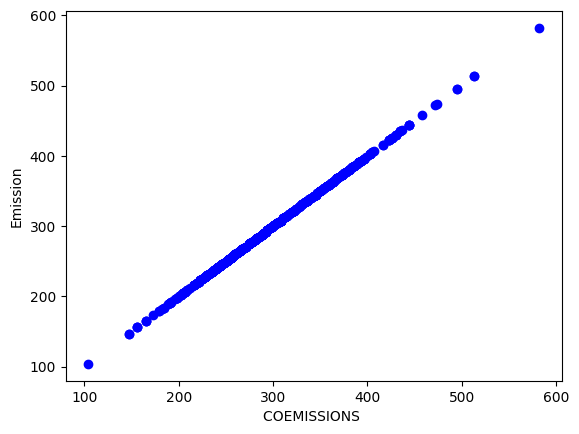

In [13]:
for i in significant[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]:
    plt.scatter(significant[i],significant['COEMISSIONS '],color='blue')
    plt.xlabel(i)
    plt.ylabel("Emission")
    plt.show()


In [15]:
mask=np.random.rand(len(df)) < 0.80                  
train=significant[mask] #80% train data
test=significant[~mask] #20% test data

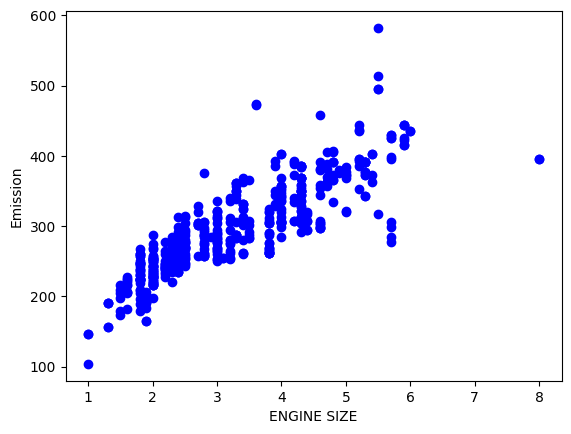

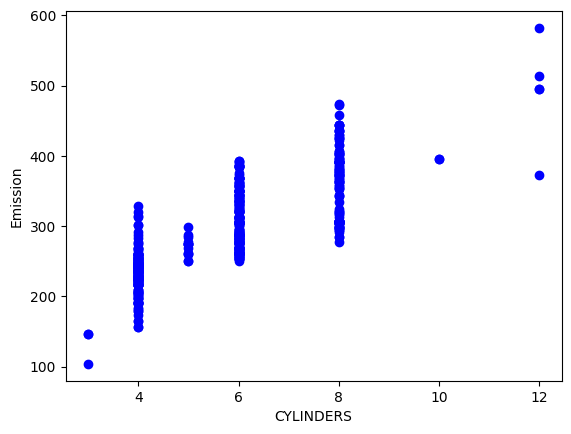

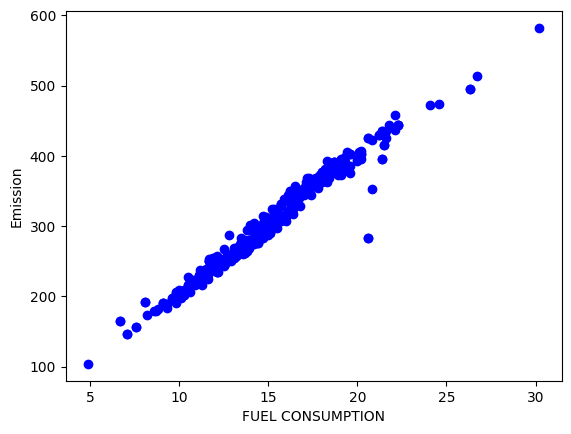

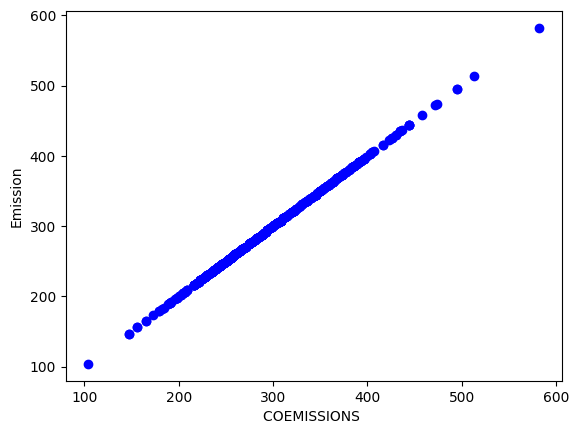

In [16]:
for i in train[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]:
    plt.scatter(train[i],train['COEMISSIONS '],color='blue')
    plt.xlabel(i)
    plt.ylabel("Emission")
    plt.show()


In [17]:
coefficient=[]
intercept=[]
regress_model={}
for i in train[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]:
    regr=linear_model.LinearRegression()
    train_x = np.asanyarray(train[[i]])
    train_y=  np.asanyarray(train[['COEMISSIONS ']])
    regr.fit(train_x, train_y)
    regress_model[i]=regr
    print("Relation between {} & {}".format(i,"'COEMISSIONS'"))
    print ('Coefficients: ', regr.coef_)
    print ('Intercept: ',regr.intercept_)
    coefficient.append(regr.coef_)
    intercept.append(regr.intercept_)
    
    print('\n')

Relation between ENGINE SIZE & 'COEMISSIONS'
Coefficients:  [[45.14136866]]
Intercept:  [148.81072176]


Relation between CYLINDERS & 'COEMISSIONS'
Coefficients:  [[32.70675409]]
Intercept:  [106.60550952]


Relation between FUEL CONSUMPTION & 'COEMISSIONS'
Coefficients:  [[19.40490095]]
Intercept:  [11.07068473]


Relation between COEMISSIONS  & 'COEMISSIONS'
Coefficients:  [[1.]]
Intercept:  [5.68434189e-14]




(503,)
(503,)


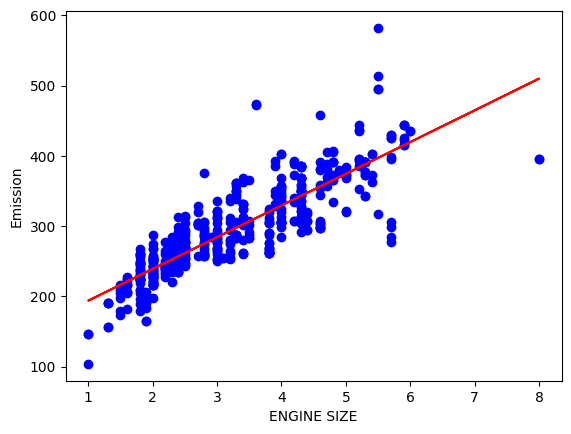

(503,)
(503,)


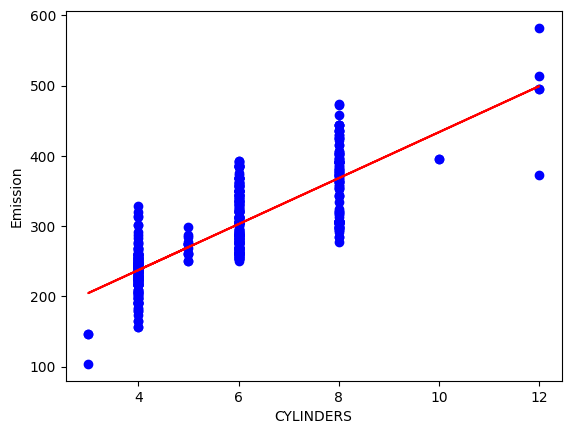

(503,)
(503,)


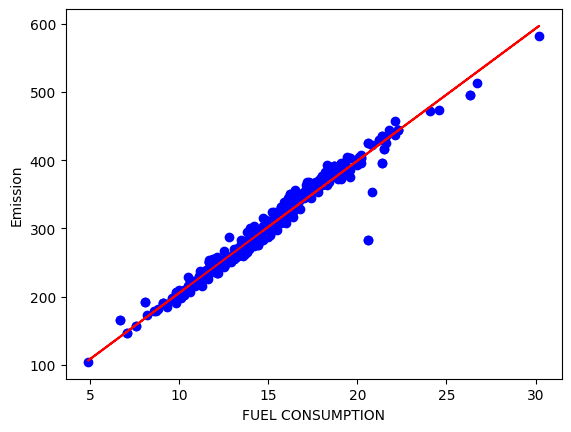

(503,)
(503,)


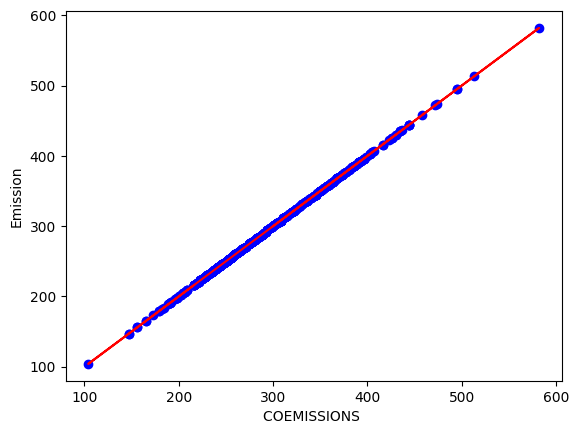

In [18]:
j=0
for i in train[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]:
    plt.scatter(train[i], train['COEMISSIONS '],  color='blue')
    x=train[i].values
    print(x.shape)
    y=coefficient[j][0]*x + intercept[j]
    print(y.shape)
    l=len(y)
    y=np.reshape(y,(l,))
    plt.plot(x, y, '-r')
    plt.xlabel(i)
    plt.ylabel("Emission")
    plt.show()
    j=j+1

In [19]:
from sklearn.metrics import r2_score

for i in train[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]:
    test_x = np.asanyarray(test[[i]])
    test_y = np.asanyarray(test[['COEMISSIONS ']])
    test_y_ = regress_model[i].predict(test_x)
    print("Fitting Error between {} & {}".format(i,"'CO2EMISSIONS'"))
    print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
    print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
    print("R2-score: %.2f" % r2_score(test_y_ , test_y) )
    print('\n')

Fitting Error between ENGINE SIZE & 'CO2EMISSIONS'
Mean absolute error: 23.93
Residual sum of squares (MSE): 1066.74
R2-score: 0.62


Fitting Error between CYLINDERS & 'CO2EMISSIONS'
Mean absolute error: 32.54
Residual sum of squares (MSE): 1598.32
R2-score: 0.42


Fitting Error between FUEL CONSUMPTION & 'CO2EMISSIONS'
Mean absolute error: 7.35
Residual sum of squares (MSE): 83.62
R2-score: 0.98


Fitting Error between COEMISSIONS  & 'CO2EMISSIONS'
Mean absolute error: 0.00
Residual sum of squares (MSE): 0.00
R2-score: 1.00


